In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from argparse import Namespace

In [2]:
td_path = 'runtime/td'
td_logs = [os.path.join(td_path, i) for i in os.listdir(td_path) if '.out' in i] 

In [3]:
td_no_neg_path = 'runtime/td_no_neg'
td_no_neg_logs = [os.path.join(td_no_neg_path, i) for i in os.listdir(td_no_neg_path) if '.out' in i] 

In [4]:
def read_td_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    runtime, cl = args.runtime, []
    for line in file.readlines()[:-3]:
        line = line.strip('\n').split(',')
        it,tdnn_accuracy,tdsnn_accuracy,tdnn_loss,tdsnn_loss,conversion_loss = line
        cl.append(float(conversion_loss))
    return runtime, cl

In [5]:
data_neg = {}
for log in td_logs:
    runtime, cl = read_td_log(log)
    if runtime not in data_neg:
        data_neg[runtime] = []
    data_neg[runtime].append(np.mean(cl))

In [6]:
data = {}
for log in td_no_neg_logs:
    runtime, cl = read_td_log(log)
    if runtime not in data:
        data[runtime] = []
    data[runtime].append(np.mean(cl))

In [7]:
clean1 = []
for k, v in data_neg.items():
    clean1.append([k, v[0]])
clean1.sort(key=lambda x : x[0])
clean1 = np.array(clean1)

In [8]:
clean2 = []
for k, v in data.items():
    clean2.append([k, v[0]])
clean2.sort(key=lambda x : x[0])
clean2 = np.array(clean2)

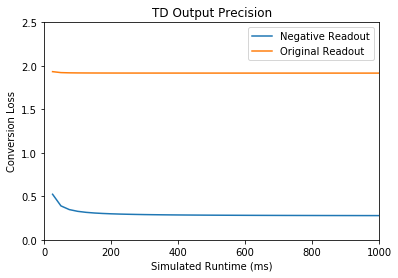

In [9]:
plt.plot(clean1[:,0], clean1[:,1], label='Negative Readout')
plt.plot(clean2[:,0], clean2[:,1], label='Original Readout')
plt.xlim(0, 1000)
plt.ylim(0, 2.5)
plt.title('TD Output Precision')
plt.ylabel('Conversion Loss')
plt.xlabel('Simulated Runtime (ms)')
plt.legend()
plt.savefig('conversion-loss.png', dpi=200, bbox_inches='tight')
plt.savefig('conversion-loss.pdf', dpi=200)